# Simulation of a two-compartment model of the passive membrane

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import sin
from math import log

In [3]:
class TwoCompartmentModel:
    
    def __init__(self, E_m, R_m, R_a, C_m):
        self.E_m = E_m
        self.R_m = R_m 
        self.R_a = R_a 
        self.C_m = C_m 
        
    def approx_membran_potential(self, delta_t, t, input_function):
        
        # Initial condition
        t = np.arange(0,t,delta_t)
        steps = t.shape[0]
       
        V_1 = np.zeros(steps)
        V_2 = np.zeros(steps)
        V_1[0] = self.E_m
        V_2[0] = self.E_m
        
        # dV_1/dt = (I_e(t) + (V_2 - V_1)/R_a + (E_m-V_1)/R_m)/C_m
        # dV_2/dt = ((V_1 - V_2)/R_a + (E_m-V_2)/R_m)/C_m
        # dV/dt = (V(t + delta_t) - V(t))/ delta_t
        
        # V_1(t + delta_t) = V_1(t) + delta_t * ((I_e(t) + (V_2 - V_1)/R_a + (E_m-V_1)/R_m)/C_m)
        # V_2(t + delta_t) = V_2(t) + delta_t * (((V_1 - V_2)/R_a + (E_m-V_2)/R_m)/C_m)
        
        for i in range(1,steps):
            V_1[i] = V_1[i-1] + delta_t * ((input_function((i-1)*delta_t) + (V_2[i-1] - V_1[i-1])/self.R_a + (self.E_m - V_1[i-1])/self.R_m)/self.C_m)
            V_2[i] = V_2[i-1] + delta_t * (((V_1[i-1] - V_2[i-1])/self.R_a + (self.E_m - V_2[i-1])/self.R_m)/self.C_m)
        
        self.V_1 = V_1
        self.V_2 = V_2
        self.t = t


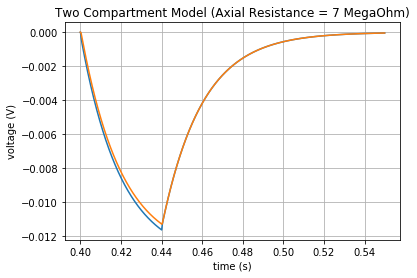

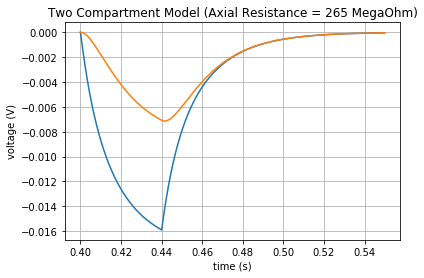

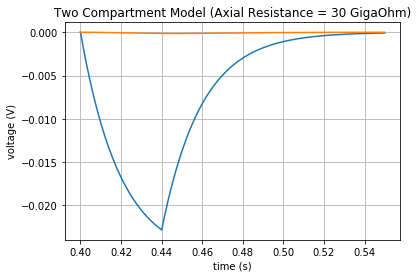

In [6]:
circuit1 = TwoCompartmentModel(0,265* 10**6,7* 10**6,75* 10**-12)
circuit2 = TwoCompartmentModel(0,265* 10**6,265* 10**6,75* 10**-12)
circuit3 = TwoCompartmentModel(0,265* 10**6,30* 10**9,75* 10**-12)

delta_t = 0.0001 #s
t_e = 0.4
t_s = 0.44


def current_function(t):
    I_e = 0
    
    if(t<t_e):
        I_e = 0
    elif(t_e <= t < t_s):
        I_e = -100 * 10**-12
    else:
        I_e=0
    
    return I_e

circuit1.approx_membran_potential(delta_t, 1, current_function)
circuit2.approx_membran_potential(delta_t, 1, current_function)
circuit3.approx_membran_potential(delta_t, 1, current_function)

# Data for plotting
# first circuit with R_a = 7 MegaOhm
t_1 = vars(circuit1)['t']
V_11 = vars(circuit1)['V_1']
V_21 = vars(circuit1)['V_2']

# second circuit with R_a = 265 MegaOhm
t_2 = vars(circuit2)['t']
V_12 = vars(circuit2)['V_1']
V_22 = vars(circuit2)['V_2']

# third circuit with R_a = 30 GigaOhm
t_3 = vars(circuit3)['t']
V_13 = vars(circuit3)['V_1']
V_23 = vars(circuit3)['V_2']


# Plots 

# ------------ 7 MegaOhm ----------------
fig1, ax1 = plt.subplots()
ax1.plot(t_1[3999:5500], V_11[3999:5500])
ax1.plot(t_1[3999:5500], V_21[3999:5500])

ax1.set(xlabel='time (s)', ylabel='voltage (V)',
       title='Two Compartment Model (Axial Resistance = 7 MegaOhm)')
ax1.grid()
plt.show()

# ------------ 265 MegaOhm ---------------
fig2, ax2 = plt.subplots()
ax2.plot(t_2[3999:5500], V_12[3999:5500])
ax2.plot(t_2[3999:5500], V_22[3999:5500])

ax2.set(xlabel='time (s)', ylabel='voltage (V)',
       title='Two Compartment Model (Axial Resistance = 265 MegaOhm)')
ax2.grid()
plt.show()    
    
# ------------ 30 GigaOhm ---------------
fig3, ax3 = plt.subplots()
ax3.plot(t_3[3999:5500], V_13[3999:5500])
ax3.plot(t_3[3999:5500], V_23[3999:5500])

ax3.set(xlabel='time (s)', ylabel='voltage (V)',
       title='Two Compartment Model (Axial Resistance = 30 GigaOhm)')
ax3.grid()
plt.show()   


Increasing the resistance between both compartments leads to a lower voltage response in the second one. The time dependend response in the first compartment stays the same but its amplitude increases. With a low axial resitance of  7 MegaOhm the response of the second compartment is similar to the first one which indicates that a low axial resitance increases the length constant of neuron. 

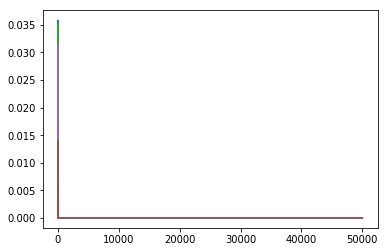

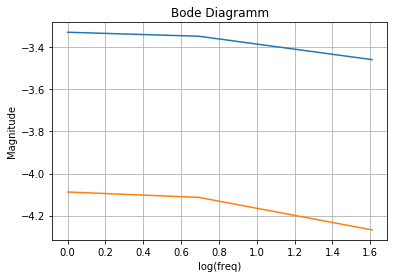

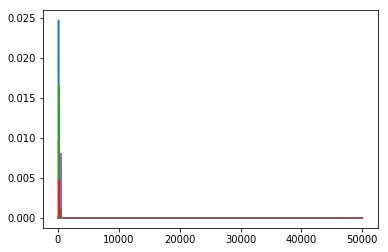

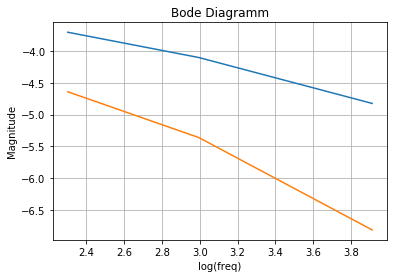

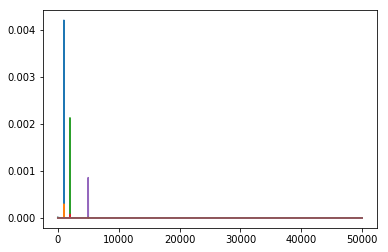

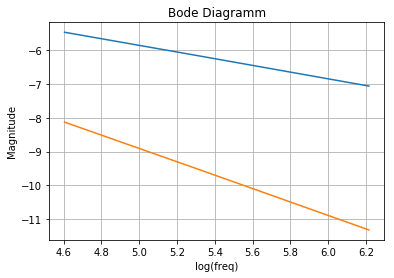

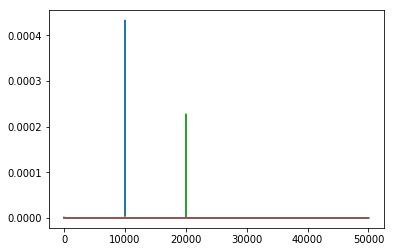

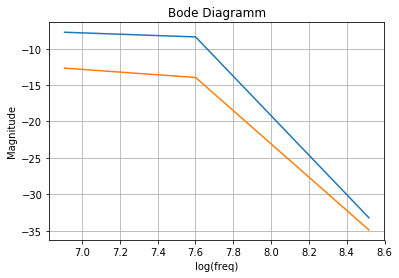

In [40]:
circuit4 = TwoCompartmentModel(0,265* 10**6,300* 10**6,75* 10**-12)

def create_sinusoidal_function(f):
    return lambda t: 100*10**-12*sin(2*pi*f*t)

frequencies_1 = [1,2,5]
frequencies_2 = [10,20,50]
frequencies_3 = [100,200,500]
frequencies_4 = [1000,2000,5000]
 
frequencies = [frequencies_1, frequencies_2, frequencies_3, frequencies_4]


A_11 = np.zeros(len(frequencies_1))
A_21 = np.zeros(len(frequencies_1))

A_12 = np.zeros(len(frequencies_2))
A_22 = np.zeros(len(frequencies_2))

A_13 = np.zeros(len(frequencies_3))
A_23 = np.zeros(len(frequencies_3))

A_14 = np.zeros(len(frequencies_4))
A_24 = np.zeros(len(frequencies_4))

A= [[A_11,A_21], [A_12,A_22], [A_13,A_23], [A_14, A_24]]

for i,fs in enumerate(frequencies):
    for j,f in enumerate(fs):
        sinusoidal = create_sinusoidal_function(f)
        circuit4.approx_membran_potential(delta_t, 10, sinusoidal)
        t = vars(circuit4)['t']
        V_1 = vars(circuit4)['V_1']
        V_2 = vars(circuit4)['V_2']
        
        V_1_ft = np.fft.fft(V_1) # discreate fourier transformation
        V_2_ft = np.fft.fft(V_2)
        N_1 = int(len(V_1_ft)/2+1)
        N_2 = int(len(V_2_ft)/2+1)

        A[i][0][j]= np.max(2.0*np.abs(V_1_ft[:N_1])/N_1)
        A[i][1][j]= np.max(2.0*np.abs(V_2_ft[:N_2])/N_2)

        plt.plot(2.0*np.abs(V_1_ft[:N_1])/N_1)
        plt.plot(2.0*np.abs(V_2_ft[:N_2])/N_2)# plot amplitude spektrum 
    plt.show()


    log_A_1 =  [log(a) for a in A[i][0]]
    log_A_2 =  [log(a) for a in A[i][1]]
    
    log_frequencies = [log(f) for f in fs]
    fig, ax = plt.subplots()
    ax.plot(log_frequencies, log_A_1)
    ax.plot(log_frequencies, log_A_2)
    ax.set(xlabel='log(freq)', ylabel='Magnitude',
               title='Bode Diagramm')
    ax.grid()
    plt.show()
